In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [193]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv', index_col=0)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [194]:
df.shape

(205843, 6)

In [195]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [196]:
print("Duplicated rows - " ,len(df[df.duplicated()]))

df.drop_duplicates(inplace=True)

print("After removing Duplicated rows - " ,len(df[df.duplicated()]))

Duplicated rows -  33
After removing Duplicated rows -  0


In [197]:
print("No. of unique job postings -- " , df['job_position'].nunique())
print("No. of Applicants -- ", df['email_hash'].nunique())
print("No. of Companies -- ", df['company_hash'].nunique())

No. of unique job postings --  1017
No. of Applicants --  153443
No. of Companies --  37299


In [198]:
## Top Job Positions by frequency
df['job_position'].value_counts().reset_index().head(10)

,index,job_position
0,Backend Engineer,43546
1,FullStack Engineer,24711
2,Other,18071
3,Frontend Engineer,10417
4,Engineering Leadership,6870
5,QA Engineer,6587
6,Data Scientist,5367
7,Android Engineer,5356
8,SDET,4967
9,Devops Engineer,4612


In [199]:
# Top 10 profiles with most Job positions
df['email_hash'].value_counts().reset_index().head(10).iloc[9]

index         4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...
email_hash                                                    8
Name: 9, dtype: object

In [200]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


That's too many position changes in the same company in the same year, which is not possible. Let's take the first entry to lessen the confusion

In [201]:
df = df.groupby('email_hash').first().reset_index()

In [202]:
df.shape

(153443, 6)

In [203]:
df.describe(include='all')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
count,153443,153411,153365.000000,1.534430e+05,133219,153443.000000
unique,153443,36339,NaN,NaN,821,NaN
top,00003288036a44374976948c327f246fdbdf0778546904...,nvnv wgzohrnvzwj otqcxwto,NaN,NaN,Backend Engineer,NaN
freq,1,5251,NaN,NaN,37313,NaN
mean,NaN,NaN,2014.535696,2.517375e+06,NaN,2019.470592
std,NaN,NaN,73.072657,1.311281e+07,NaN,1.367097
min,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,NaN,NaN,2013.000000,5.500000e+05,NaN,2019.000000
50%,NaN,NaN,2016.000000,9.699990e+05,NaN,2020.000000
75%,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


Feature Engineering

In [204]:
df.isna().sum()

email_hash              0
company_hash           32
orgyear                78
ctc                     0
job_position        20224
ctc_updated_year        0
dtype: int64

In [220]:
import math
df['Years of Experience'] = abs((df['ctc_updated_year'] - df['orgyear']))


In [222]:
from sklearn.impute import KNNImputer

cols_with_missing = ['Years of Experience', 'ctc']

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=50)  

# Perform imputation on the selected columns
df_filled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_filled[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

# Display the DataFrame after imputation
print(df_filled.isna().sum())


email_hash                 0
company_hash              32
orgyear                   78
ctc                        0
job_position           20224
ctc_updated_year           0
Years of Experience        0
dtype: int64


In [223]:
def remove_outliers_iqr(df, column_name, lower_bound=None, upper_bound=None):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    if lower_bound is None:
        lower_bound = Q1 - 1.5 * IQR
    if upper_bound is None:
        upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows based on the specified column and bounds
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [224]:
df_fr = remove_outliers_iqr(df_filled, 'ctc')

In [225]:
df_fr = remove_outliers_iqr(df_fr, 'Years of Experience')

In [227]:
import math
df_fr['Years of Experience'] = df_fr['Years of Experience'].apply(math.floor)

<Axes: xlabel='ctc', ylabel='Count'>

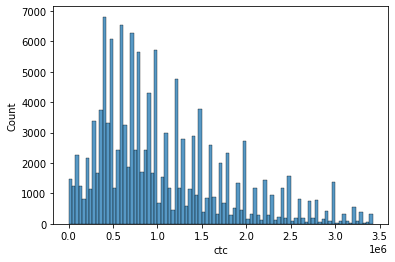

In [229]:
sns.histplot(df_fr['ctc'])


<Axes: xlabel='Years of Experience', ylabel='Count'>

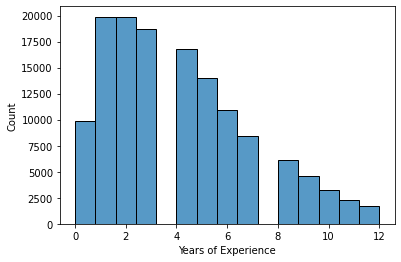

In [230]:
sns.histplot(df_fr['Years of Experience'], bins =15)

In [242]:
company_ctc = df_fr.groupby('company_hash')['ctc'].mean().reset_index()
company_ctc.rename(columns={'ctc': 'company_ctc'}, inplace=True)
yoe_ctc = df_fr.groupby('Years of Experience')['ctc'].mean().reset_index()
yoe_ctc.rename(columns={'ctc': 'yoe_ctc'}, inplace=True)
job_ctc = df_fr.groupby('job_position')['ctc'].mean().reset_index()
job_ctc.rename(columns={'ctc': 'job_ctc'}, inplace=True)

In [243]:
# Merge company_ctc with df_fr on 'company_hash'
df_fr_merged = pd.merge(df_fr, company_ctc, on='company_hash', how='left')

# Merge yoe_ctc with df_fr_merged on 'Years of Experience'
df_fr_merged = pd.merge(df_fr_merged, yoe_ctc, on='Years of Experience', how='left')

# Merge yoe_ctc with df_fr_merged on 'Years of Experience'
df_fr_merged = pd.merge(df_fr_merged, job_ctc, on='job_position', how='left')


In [244]:
df_fr_merged

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,company_ctc,yoe_ctc,job_ctc
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7,2.500000e+05,1.303727e+06,1.234631e+06
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000.0,FullStack Engineer,2019.0,2,1.295574e+06,8.904474e+05,1.025430e+06
2,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000.0,None,2018.0,9,2.006302e+06,1.501835e+06,NaN
3,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2,5.660323e+05,8.904474e+05,8.581584e+05
4,00022dc29c7f77032275182b883d4f273ea1007aefc437...,xzeqvwrgha ntwyzgrgsxto,2016.0,750000.0,Frontend Engineer,2019.0,3,1.107500e+06,9.516103e+05,9.904613e+05
...,...,...,...,...,...,...,...,...,...,...
136385,fffbf480e0003fe636e4d73543eaa472305e1a720c1fd3...,ihtoo wgqu,2014.0,640000.0,Other,2020.0,6,5.485714e+05,1.189899e+06,8.012546e+05
136386,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,trnqvcg,2015.0,1600000.0,None,2018.0,3,1.600000e+06,9.516103e+05,NaN
136387,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,znn avnv srgmvr atrxctqj otqcxwto,2014.0,900000.0,Devops Engineer,2019.0,5,8.106250e+05,1.102183e+06,1.103730e+06
136388,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,zwq wgqugqvnxgz,2020.0,700000.0,FullStack Engineer,2020.0,0,1.003429e+06,8.478481e+05,1.025430e+06


In [251]:
def compare_flag(x, y):
    if x > y:
        return 3
    elif x == y:
        return 2
    else:
        return 1



In [252]:
# Define conditions and values for ctc_flag
ctc_conditions = [
    (df_fr_merged['ctc'] > df_fr_merged['company_ctc']),
    (df_fr_merged['ctc'] == df_fr_merged['company_ctc']),
    (df_fr_merged['ctc'] < df_fr_merged['company_ctc'])
]
ctc_values = [3, 2, 1]
df_fr_merged['ctc_flag'] = np.select(ctc_conditions, ctc_values)

# Define conditions and values for yoe_flag
yoe_conditions = [
    (df_fr_merged['ctc'] > df_fr_merged['yoe_ctc']),
    (df_fr_merged['ctc'] == df_fr_merged['yoe_ctc']),
    (df_fr_merged['ctc'] < df_fr_merged['yoe_ctc'])
]
yoe_values = [3, 2, 1]
df_fr_merged['yoe_flag'] = np.select(yoe_conditions, yoe_values)



In [254]:
job_conditions = [
    (df_fr_merged['ctc'] > df_fr_merged['job_ctc']),
    (df_fr_merged['ctc'] == df_fr_merged['job_ctc']),
    (df_fr_merged['ctc'] < df_fr_merged['job_ctc'])
]
job_values = [3, 2, 1]
df_fr_merged['job_flag'] = np.select(job_conditions, job_values)

df_fr_merged

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,company_ctc,yoe_ctc,job_ctc,ctc_flag,yoe_flag,job_flag
0,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7,2.500000e+05,1.303727e+06,1.234631e+06,2,1,1
1,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000.0,FullStack Engineer,2019.0,2,1.295574e+06,8.904474e+05,1.025430e+06,3,3,3
2,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000.0,None,2018.0,9,2.006302e+06,1.501835e+06,NaN,3,3,0
3,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2,5.660323e+05,8.904474e+05,8.581584e+05,1,1,1
4,00022dc29c7f77032275182b883d4f273ea1007aefc437...,xzeqvwrgha ntwyzgrgsxto,2016.0,750000.0,Frontend Engineer,2019.0,3,1.107500e+06,9.516103e+05,9.904613e+05,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136385,fffbf480e0003fe636e4d73543eaa472305e1a720c1fd3...,ihtoo wgqu,2014.0,640000.0,Other,2020.0,6,5.485714e+05,1.189899e+06,8.012546e+05,3,1,1
136386,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,trnqvcg,2015.0,1600000.0,None,2018.0,3,1.600000e+06,9.516103e+05,NaN,2,3,0
136387,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,znn avnv srgmvr atrxctqj otqcxwto,2014.0,900000.0,Devops Engineer,2019.0,5,8.106250e+05,1.102183e+06,1.103730e+06,3,1,1
136388,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,zwq wgqugqvnxgz,2020.0,700000.0,FullStack Engineer,2020.0,0,1.003429e+06,8.478481e+05,1.025430e+06,1,1,1
